In [1]:
import pandas as pd
df = pd.read_pickle("dataset_prep.pkl")

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3303169 entries, 0 to 3303168
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   no.                    3303169 non-null  object        
 1   announce_date          3303169 non-null  datetime64[ns]
 2   notified_date          3303169 non-null  datetime64[ns]
 3   sex                    3303169 non-null  category      
 4   age                    3303169 non-null  float64       
 5   unit                   3303169 non-null  object        
 6   nationality            3303169 non-null  object        
 7   province_of_isolation  3303169 non-null  object        
 8   risk                   3301982 non-null  object        
 9   province_of_onset      3303169 non-null  object        
 10  district_of_onset      2803798 non-null  object        
dtypes: category(1), datetime64[ns](2), float64(1), object(7)
memory usage: 255.2+ MB


In [4]:
df.head()

,no.,announce_date,notified_date,sex,age,unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset
0,1,2020-01-12,2020-01-12,Female,61.0,ปี,china,กรุงเทพ,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
1,2,2020-01-17,2020-01-17,Female,74.0,ปี,china,กรุงเทพ,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
2,3,2020-01-22,2020-01-22,Female,73.0,ปี,thailand,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง
3,4,2020-01-22,2020-01-22,Male,68.0,ปี,china,กรุงเทพ,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN
4,5,2020-01-24,2020-01-24,Female,66.0,ปี,china,นนทบุรี,คนต่างชาติเดินทางมาจากต่างประเทศ,กรุงเทพมหานคร,NaN


In [5]:
df["count"] = 1 #เอาไว้ count รายการต่างๆ #df.values_count บางครั้งเครื่องค้าง

# Question & Answers

## 1. Top 5 province_of_isolation: proportion of sex

In [6]:
df["sex"].value_counts()

Female    1652968
Male      1471141
na         179060
Name: sex, dtype: int64

In [7]:
p_sex = df.groupby(by=["province_of_isolation", "sex"]).agg({"count":sum})

In [8]:
p_sex.drop(index = "na", level=0, inplace=True)
p_sex.drop(index = "na", level=1, inplace=True)

In [9]:
p_sex = p_sex.sort_values(by="count", ascending=False).head(10)

In [10]:
p_sex

count
province_of_isolation sex           
กรุงเทพ               Female  275554
                      Male    266878
สมุทรปราการ           Female  103320
                      Male     93699
ชลบุรี                Female   90896
                      Male     86012
สมุทรสาคร             Female   78156
                      Male     60003
นนทบุรี               Male     54438
                      Female   54218

In [11]:
p_sex.reset_index(inplace=True)
p_sex

,province_of_isolation,sex,count
0,กรุงเทพ,Female,275554
1,กรุงเทพ,Male,266878
2,สมุทรปราการ,Female,103320
3,สมุทรปราการ,Male,93699
4,ชลบุรี,Female,90896
5,ชลบุรี,Male,86012
6,สมุทรสาคร,Female,78156
7,สมุทรสาคร,Male,60003
8,นนทบุรี,Male,54438
9,นนทบุรี,Female,54218


In [12]:
p_sex.columns

Index(['province_of_isolation', 'sex', 'count'], dtype='object')

In [13]:
#เจอปัญหาภาษาไทย

p_sex.loc[p_sex["province_of_isolation"] == "กรุงเทพ","province_of_isolation"] = "Bangkok"
p_sex.loc[p_sex["province_of_isolation"] == "สมุทรปราการ","province_of_isolation"] = "Samutprakarn"
p_sex.loc[p_sex["province_of_isolation"] == "ชลบุรี","province_of_isolation"] = "Chonburi"
p_sex.loc[p_sex["province_of_isolation"] == "สมุทรสาคร","province_of_isolation"] = "samutsakorn"
p_sex.loc[p_sex["province_of_isolation"] == "นนทบุรี","province_of_isolation"] = "nonthaburi"

In [14]:
p_sex

,province_of_isolation,sex,count
0,Bangkok,Female,275554
1,Bangkok,Male,266878
2,Samutprakarn,Female,103320
3,Samutprakarn,Male,93699
4,Chonburi,Female,90896
5,Chonburi,Male,86012
6,samutsakorn,Female,78156
7,samutsakorn,Male,60003
8,nonthaburi,Male,54438
9,nonthaburi,Female,54218


In [15]:
graph_1 = p_sex.pivot(index="province_of_isolation", columns="sex",values="count")

In [16]:
graph_1.sort_index(ascending=False, inplace=True)

In [17]:
graph_1

sex,Female,Male
province_of_isolation,,
samutsakorn,78156,60003
nonthaburi,54218,54438
Samutprakarn,103320,93699
Chonburi,90896,86012
Bangkok,275554,266878


<AxesSubplot:ylabel='province_of_isolation'>

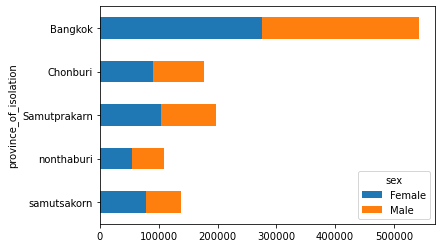

In [18]:
graph_1.plot.barh(stacked=True, sort_columns=True)

### 2. Top Peak per day
>- In each year
>- All three years

In [19]:
peak_day = df.groupby("announce_date").agg({"count":sum})

In [20]:
Top_peak_all = peak_day.sort_values("count", ascending=False).head(10) #From 2020 to Mar 2022

<AxesSubplot:xlabel='announce_date'>

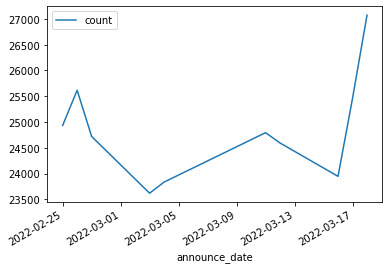

In [21]:
Top_peak_all.plot() #ปรากฎว่าทั้งหมดอยู่ในปี 2022

In [22]:
Y2020 = peak_day.loc["2020-01-01" : "2020-12-31"]
Top_peak_2020 = Y2020.sort_values("count", ascending=False).head(1) #In 2020
Top_peak_2020

,count
announce_date,
2020-12-20,576


In [23]:
Y2021 = peak_day.loc["2021-01-01" : "2021-12-31"]
Top_peak_2021 = Y2021.sort_values("count", ascending=False).head(1) #In 2021
Top_peak_2021

,count
announce_date,
2021-08-13,23418


In [24]:
Y2022 = peak_day.loc["2022-01-01" : "2022-12-31"]
Top_peak_2022 =Y2022.sort_values("count", ascending=False).head(1) #In 2022
Top_peak_2022

,count
announce_date,
2022-03-18,27071


In [25]:
#เนื่องจากการ annotate กราฟ มันต้องการเป็น float เพื่อบอกระยะ แต่แกน x เราเป็น datetime

In [26]:
adate = Top_peak_2020.reset_index()
adate = adate["announce_date"]
adate20 = mpl.dates.date2num(adate)

In [27]:
adate = Top_peak_2022.reset_index()
adate = adate["announce_date"]
adate22 =  mpl.dates.date2num(adate)

In [28]:
adate = Top_peak_2021.reset_index()
adate = adate["announce_date"]
adate21 =  mpl.dates.date2num(adate)

In [29]:
Top_peak_2022.iloc[0] #ตัวอย่างการ access แบบ iloc

count    27071
Name: 2022-03-18 00:00:00, dtype: int64

Text([19069.], count    27071
Name: 2022-03-18 00:00:00, dtype: int64, 'Peak Y2022')

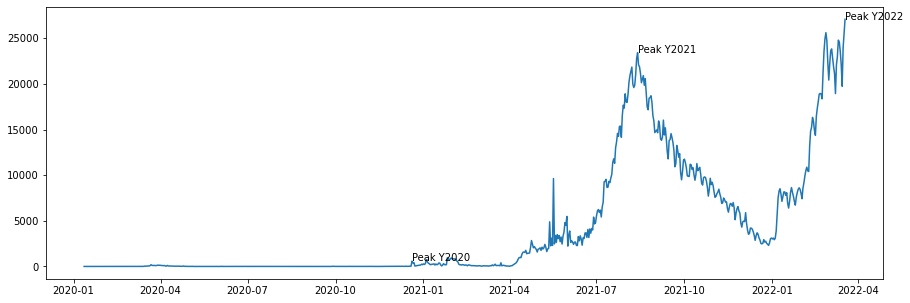

In [30]:
fig, ax = plt.subplots(figsize=(15, 5))
line, = ax.plot(peak_day)
ax.annotate("Peak Y2020",xy=(adate20,Top_peak_2020.iloc[0]) )
ax.annotate("Peak Y2021",xy=(adate21,Top_peak_2021.iloc[0]) )
ax.annotate("Peak Y2022",xy=(adate22,Top_peak_2022.iloc[0]) )

In [31]:
#ตอนแรกเข้าใจว่า ปี2021 น่าจะมียอดเยอะ แต่ปรากฎว่าปี 2022 มียอดเยอะกว่า 
#สาเหตุน่าจะมาจากตอนปี 2021 มีอัตราผู้เสียชีวิตเยอะ แต่ปี 2022 ยอดเยอะจริง แต่อาการไม่รุนแรง

## 3. Thailand Top10 Risk

In [32]:
thai = df.loc[df["nationality"] == "thai"]

In [33]:
thai.groupby(by="risk").agg({"count":sum}).sort_values("count", ascending=False).head(10) #before prep

,count
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,11267
อื่นๆ,5341
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,1646
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,865
อยู่ระหว่างการสอบสวน,626
ระบุไม่ได้,353
สถานที่ทำงาน,323
บุคลากรด้านการแพทย์และสาธารณสุข,77
พิธีกรรมทางศาสนา,52


In [34]:
Thai_risk = thai.groupby(by="risk").agg({"count":sum}).sort_values("count", ascending=False)

In [35]:
Thai_risk = Thai_risk.drop(index=["อื่นๆ", "ระบุไม่ได้", "อยู่ระหว่างการสอบสวน"]).head(5) #after prep

In [36]:
Thai_risk

,count
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,11267
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,1646
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,865
สถานที่ทำงาน,323
บุคลากรด้านการแพทย์และสาธารณสุข,77


In [37]:
Thai_risk["count"]

risk
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้         11267
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน     1646
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว         865
สถานที่ทำงาน                                          323
บุคลากรด้านการแพทย์และสาธารณสุข                        77
Name: count, dtype: int64

In [38]:
Thai_risk.index

Index(['สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้',
       'การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน',
       'ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว', 'สถานที่ทำงาน',
       'บุคลากรด้านการแพทย์และสาธารณสุข'],
      dtype='object', name='risk')

In [39]:
#แก้ปัญหา font อ่านไทยไม่ออก

In [40]:
font = {'family' : 'tahoma',
        'weight' : 'normal',
        'size'   : '15'}

plt.rc("font", **font)  # pass in the font dict as kwargs.
#plt.rc(group, **kwargs)

## The font.weight property has effectively 13 values: normal, bold,
## bolder, lighter, 100, 200, 300, ..., 900.  Normal is the same as
## 400, and bold is 700.  bolder and lighter are relative values with
## respect to the current weight.

## The font.size property is the default font size for text, given in points.
## 10 pt is the standard value.

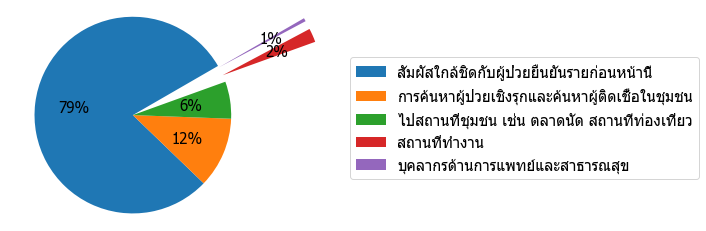

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = Thai_risk.index
values = Thai_risk["count"]

fig1, ax1 = plt.subplots()
ax1.pie(values
        ,labels=labels
        ,explode=(0,0,0,1,1)
        ,autopct='%1.0f%%'   #str format
        ,startangle=30   #The angle by which the start of the pie is rotated counterclockwise from the x-axis.
        ,rotatelabels=True   #Rotate each label to the angle of the corresponding slice
        ,labeldistance=None   #If set to None, label are not drawn, but are stored for use in legend()
       )

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(loc='best', bbox_to_anchor=(1, 0.8)) # กำหนดตำแหน่งของกราฟ

plt.show()

# 3 Insight Question & Answers

## 1. Top 10 nationality
> - without southeast asia countries

In [42]:
nation = df["nationality"].value_counts().sort_values(ascending=False) #before prep

In [43]:
type(nation)

pandas.core.series.Series

In [44]:
nation.head(20)

thailand      2765670
other          288225
burmese        133855
cambodian       38984
thai            20632
burma           18827
laotian          9035
russian          3591
british          1955
chinese          1928
american         1245
german           1202
french           1142
indian           1121
japanese          931
cambodia          854
laos              781
australian        686
swedish           645
filipino          627
Name: nationality, dtype: int64

In [45]:
df.loc[df["nationality"] == "thailand","nationality"] = "thai"
df.loc[df["nationality"] == "burma","nationality"] = "burmese"
df.loc[df["nationality"] == "laos","nationality"] = "laotian"
df.loc[df["nationality"] == "cambodia","nationality"] = "cambodian"

In [46]:
nation = df["nationality"].value_counts().sort_values(ascending=False) #after prep

In [47]:
Top10_nation = nation .drop(index=['thai', 'other', 'burmese', 'cambodian', 'laotian']).head(10)

In [48]:
Top10_nation #รายละเอียดตามนี้

russian       3591
british       1955
chinese       1928
american      1245
german        1202
french        1142
indian        1121
japanese       931
australian     686
swedish        645
Name: nationality, dtype: int64

## 2. Risk for Top 10 nationality
> - without southeast asia countries

In [49]:
Top10_nation.index

Index(['russian', 'british', 'chinese', 'american', 'german', 'french',
       'indian', 'japanese', 'australian', 'swedish'],
      dtype='object')

In [50]:
df["nationality"].isin(Top10_nation.index)

0          False
1          False
2          False
3          False
4          False
           ...  
3303164    False
3303165    False
3303166    False
3303167    False
3303168    False
Name: nationality, Length: 3303169, dtype: bool

In [51]:
R_10n = df.loc[df["nationality"].isin(Top10_nation.index),"risk"]

In [52]:
R_10n.value_counts() #เรามาดูสาเหตุต่อว่าเป็นนักที่ยว หรือ คนมาทำธุรกิจ ?

Phuket Sandbox                                                                    3826
Test and Go                                                                       2880
อื่นๆ                                                                             2414
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้                                       1782
อยู่ระหว่างการสอบสวน                                                              1703
ผู้ที่เดินทางมาจากต่างประเทศ และเข้า AQ                                            466
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว                                      348
สถานที่ทำงาน                                                                       228
Samui plus                                                                         151
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน                                   147
Chonburi Sandbox                                                                   144
Phang Nga Sandbox                          

## 3. Average Age(ปี) of each risk
- Remove age>1 and age<100
- เนื่องจากพบการบันทึกอายุไม่ถูกต้อง

In [53]:
df["age"].describe().round(decimals=2)

count    3303169.00
mean          32.50
std           31.88
min            0.00
25%           19.00
50%           31.00
75%           46.00
max        44899.00
Name: age, dtype: float64

In [54]:
c1 = df["age"] > 1
c2 = df["age"] < 100

In [55]:
A_age = df.loc[c1 & c2]

In [56]:
A_age["age"].describe().round(decimals=2)

count    3002951.00
mean          35.72
std           18.18
min            1.10
25%           23.00
50%           34.00
75%           48.00
max           99.00
Name: age, dtype: float64

In [57]:
r_10 = df.groupby(by="risk").agg({"age":"mean","count":sum}).sort_values(by="count", ascending=False).head(10)
r_10
#ทัณฑสถาน/เรือนจำ อายุเฉลี่ยต่ำกว่า บุคลากรด้านการแพทย์

,age,count
risk,,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,33.607712,1393527
อื่นๆ,31.958312,957988
อยู่ระหว่างการสอบสวน,29.965663,293199
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,32.950818,251745
ทัณฑสถาน/เรือนจำ,24.319894,93112
สถานที่ทำงาน,32.453588,91775
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,36.928322,77625
ระบุไม่ได้,32.954441,37055
บุคลากรด้านการแพทย์และสาธารณสุข,34.851088,20255


In [58]:
r1 = df.loc[df["risk"].isin(r_10.index),["risk","age"]]

age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

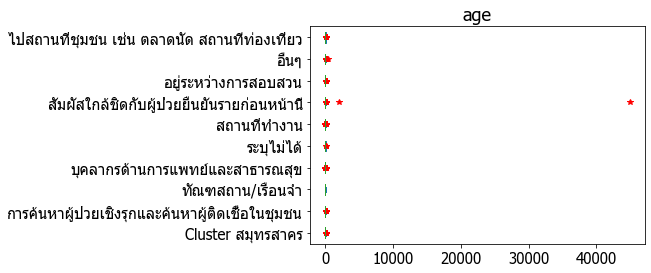

In [59]:
r1.plot.box(vert = False, column="age", by="risk", sym="r*") #มี flier point หลุดไป 4พันกว่า

age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

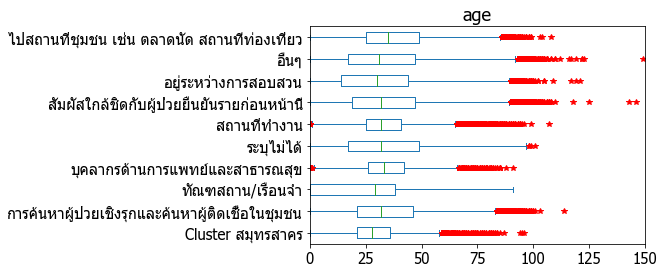

In [60]:
r1.plot.box(vert = False, column="age", by="risk", sym="r*", xlim=(0,150))

age    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

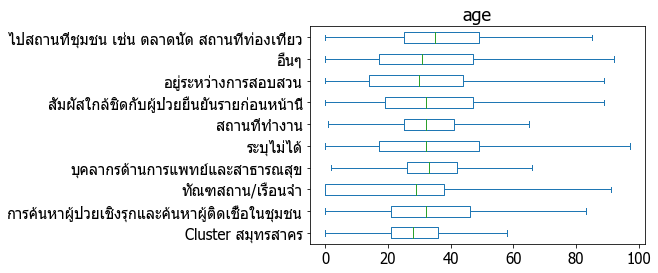

In [61]:
r1.plot.box(vert = False, column="age", by="risk", showfliers=False)

#เลือกไม่โชว์ flier
#min-Q1-median-Q3-max

# 

- ดูต่อว่ากลุ่มผู้สูงอายุ (Age > 60) และ สัญญชาติไทย (thai) มีสาเหตุมาจากการคนใกล้ชิด หรือไม่

In [62]:
nation.head() #คนไทย 2.7 ล้านคน

thai         2786302
other         288225
burmese       152682
cambodian      39838
laotian         9816
Name: nationality, dtype: int64

In [63]:
t_1 = A_age["age"] > 60   #จาก 1-100 เรามา filter คนที่มีอายุมากกว่า 60
t_2 = A_age["nationality"] == "thai" 
elder = A_age.loc[t_1 & t_2]
elder # 0.27 ล้านคน

,no.,announce_date,notified_date,sex,age,unit,nationality,province_of_isolation,risk,province_of_onset,district_of_onset,count
2,3,2020-01-22,2020-01-22,Female,73.0,ปี,thai,นครปฐม,คนต่างชาติเดินทางมาจากต่างประเทศ,นครปฐม,เมือง,1
24,25,2020-02-04,2020-02-04,Male,70.0,ปี,thai,สมุทรปราการ,อาชีพเสี่ยง เช่น ทำงานในสถานที่แออัด หรือทำงาน...,สมุทรปราการ,NaN,1
37,38,2020-02-26,2020-02-26,Male,64.0,ปี,thai,กรุงเทพ,คนไทยเดินทางกลับจากต่างประเทศ,กรุงเทพมหานคร,ดอนเมือง,1
38,39,2020-02-26,2020-02-26,Female,62.0,ปี,thai,กรุงเทพ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,ดอนเมือง,1
75,76,2020-03-14,2020-03-14,Female,63.0,ปี,thai,กรุงเทพ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3302983,3302984,2022-03-18,2022-03-17,Female,74.0,ปี,thai,กรุงเทพ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,บางกะปิ,1
3302990,3302991,2022-03-18,2022-03-17,Female,69.0,ปี,thai,กรุงเทพ,อื่นๆ,กรุงเทพมหานคร,ยานนาวา,1
3302996,3302997,2022-03-18,2022-03-17,Male,62.0,ปี,thai,กรุงเทพ,อื่นๆ,กรุงเทพมหานคร,พระนคร,1
3302999,3303000,2022-03-18,2022-03-17,Male,75.0,ปี,thai,กรุงเทพ,สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,กรุงเทพมหานคร,พระโขนง,1


In [64]:
#df.loc[df["nationality"] == "thai", "age"].describe().round(2)
#อายุเฉลี่ยคนไทยที่ติดโควิท

In [65]:
elder = elder.groupby("risk").agg({"count":sum}).sort_values(by="count", ascending=False)

In [66]:
elder.drop(index="อื่นๆ", inplace=True)

In [67]:
elder #ตอบ ใช่

,count
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,137808
อยู่ระหว่างการสอบสวน,20484
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,17215
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,6778
ระบุไม่ได้,3577
...,...
ปอดอักเสบ Pneumonia,1
Sandbox,1
Songkhla Sandbok,1


In [68]:
elder.apply(lambda x : (x / float(elder.sum()) *100)) #เพื่อให้เห็นภาพชัดขึ้น ...คิดเป็น 71%   #ใช้ .apply() method

,count
risk,
สัมผัสใกล้ชิดกับผู้ป่วยยืนยันรายก่อนหน้านี้,71.388313
อยู่ระหว่างการสอบสวน,10.611272
การค้นหาผู้ป่วยเชิงรุกและค้นหาผู้ติดเชื้อในชุมชน,8.917841
ไปสถานที่ชุมชน เช่น ตลาดนัด สถานที่ท่องเที่ยว,3.511189
ระบุไม่ได้,1.852984
...,...
ปอดอักเสบ Pneumonia,0.000518
Sandbox,0.000518
Songkhla Sandbok,0.000518
